<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/SKY-SAVER-BUDGET-JET-INDIAN-FARE-ANALYSIS/blob/main/Banglore_to_Delhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import datetime

<ipython-input-142-ff51322822ed>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
Indigo = pd.read_excel("/content/A - Indigo.xlsx")

In [ ]:
Jetairways = pd.read_excel("/content/A - jet Air ways.xlsx")

In [ ]:
Indigo.head()

,Date,Airlines,From,To,Fare
0,2019-01-01,IndiGo,Banglore,New Delhi,13302
1,2019-01-02,IndiGo,Banglore,New Delhi,8153
2,2019-01-03,IndiGo,Banglore,New Delhi,9694
3,2019-01-04,IndiGo,Banglore,New Delhi,14306
4,2019-01-05,IndiGo,Banglore,New Delhi,14306


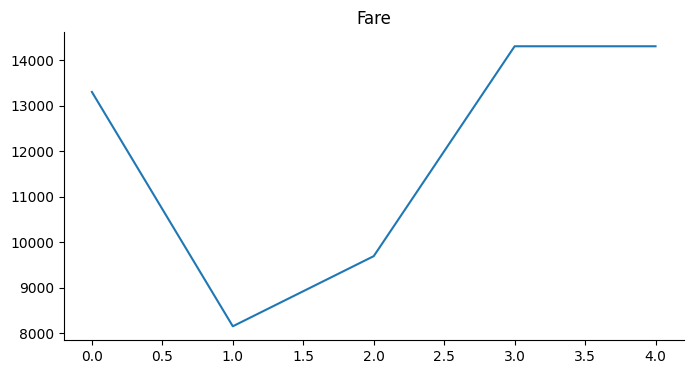

In [ ]:
from matplotlib import pyplot as plt
_df_17['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
Jetairways.head()

,Date,Airlines,From,To,Fare
0,2019-01-01,Jet Airways,Banglore,New Delhi,22270
1,2019-01-02,Jet Airways,Banglore,New Delhi,26890
2,2019-01-03,Jet Airways,Banglore,New Delhi,26890
3,2019-01-04,Jet Airways,Banglore,New Delhi,26890
4,2019-01-05,Jet Airways,Banglore,New Delhi,25735


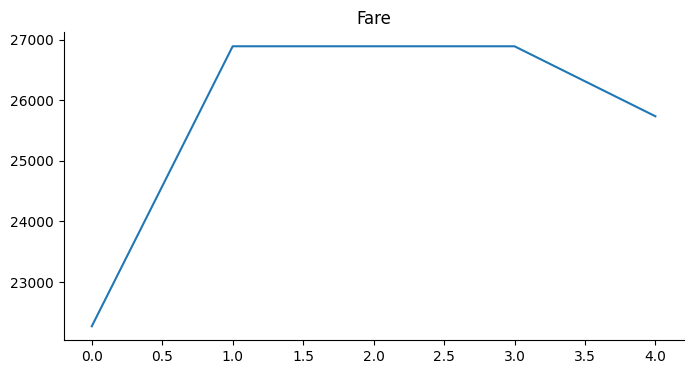

In [ ]:
from matplotlib import pyplot as plt
_df_23['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
pip install pmdarima


In [ ]:
Indigo.head()

,Date,Airlines,From,To,Fare
0,2019-01-01,IndiGo,Banglore,New Delhi,13302
1,2019-01-02,IndiGo,Banglore,New Delhi,8153
2,2019-01-03,IndiGo,Banglore,New Delhi,9694
3,2019-01-04,IndiGo,Banglore,New Delhi,14306
4,2019-01-05,IndiGo,Banglore,New Delhi,14306


In [ ]:
Indigo.tail()

,Date,Airlines,From,To,Fare
1090,2023-12-27,IndiGo,Banglore,Delhi,3600
1091,2023-12-28,IndiGo,Banglore,Delhi,3700
1092,2023-12-29,IndiGo,Banglore,Delhi,3200
1093,2023-12-30,IndiGo,Banglore,Delhi,3500
1094,2023-12-31,IndiGo,Banglore,Delhi,3900


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(Indigo['Fare'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=19272.896, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=18560.436, Time=5.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=6.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=19028.740, Time=0.29 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=18446.655, Time=12.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.90 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=18716.332, Time=5.47 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=18273.618, Time=10.87 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=18391.142, Time=4.78 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=16.42 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.43 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=18213.611, Time=11.68 sec
 ARIMA(3,1,0)(1,1,0)[12]            

In [ ]:

train = Indigo.iloc[:len(Indigo)-30]
test = Indigo.iloc[len(Indigo)-30:]


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Fare'],
                order = (10,1,0),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()


model1 = result

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

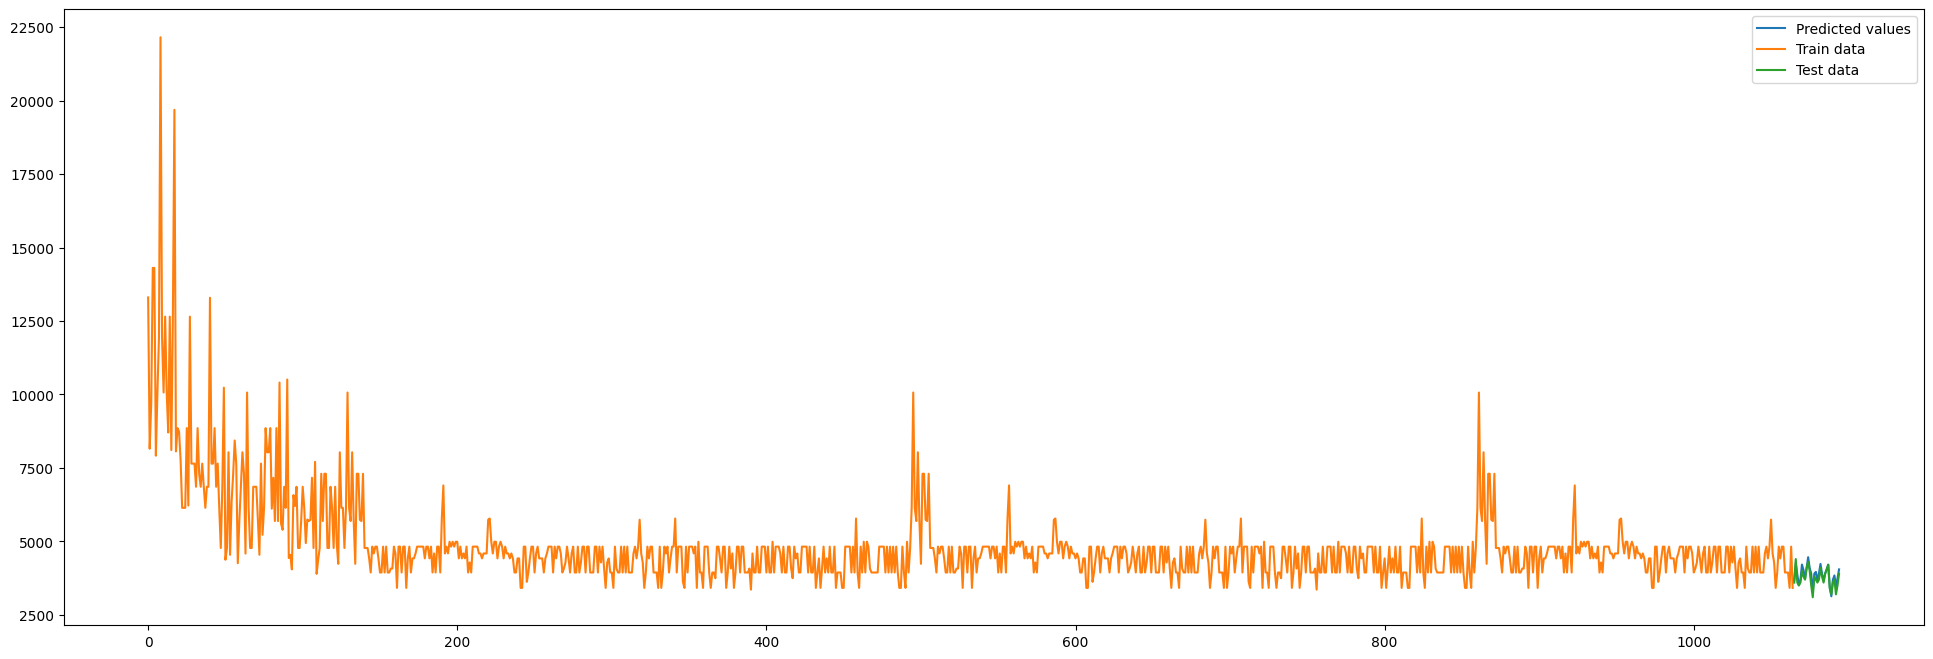

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'linear')


# plot predictions and actual values
predictions.plot(figsize = (24, 8), legend = True, label = "Predicted values")
train['Fare'].plot(legend = True, label = "Train data")
test['Fare'].plot(legend = True, label = "Test data")

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test['Fare'],predictions)
print(r2)

0.7292192236260772


In [ ]:
Jetairways.head()

,Date,Airlines,From,To,Fare
0,2019-01-01,Jet Airways,Banglore,New Delhi,22270
1,2019-01-02,Jet Airways,Banglore,New Delhi,26890
2,2019-01-03,Jet Airways,Banglore,New Delhi,26890
3,2019-01-04,Jet Airways,Banglore,New Delhi,26890
4,2019-01-05,Jet Airways,Banglore,New Delhi,25735


In [ ]:
stepwise_fit = auto_arima(Jetairways['Fare'], start_p = 1, start_q = 1,
                          max_p = 10, max_q = 10, m = 12,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=5.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=22417.944, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=21903.105, Time=0.90 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=3.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=22201.988, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=21793.224, Time=2.77 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.44 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.06 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=21998.711, Time=1.33 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=21629.326, Time=3.84 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=21710.768, Time=1.63 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=16.80 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=6.99 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=21519.444, Time=3.43 sec
 ARIMA(3,1,0)(1,1,0)[12]             : 

In [ ]:

train = Jetairways.iloc[:len(Jetairways)-30]
test = Jetairways.iloc[len(Jetairways)-30:]


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Fare'],
                order = (10,1,0),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()

model2 = result


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

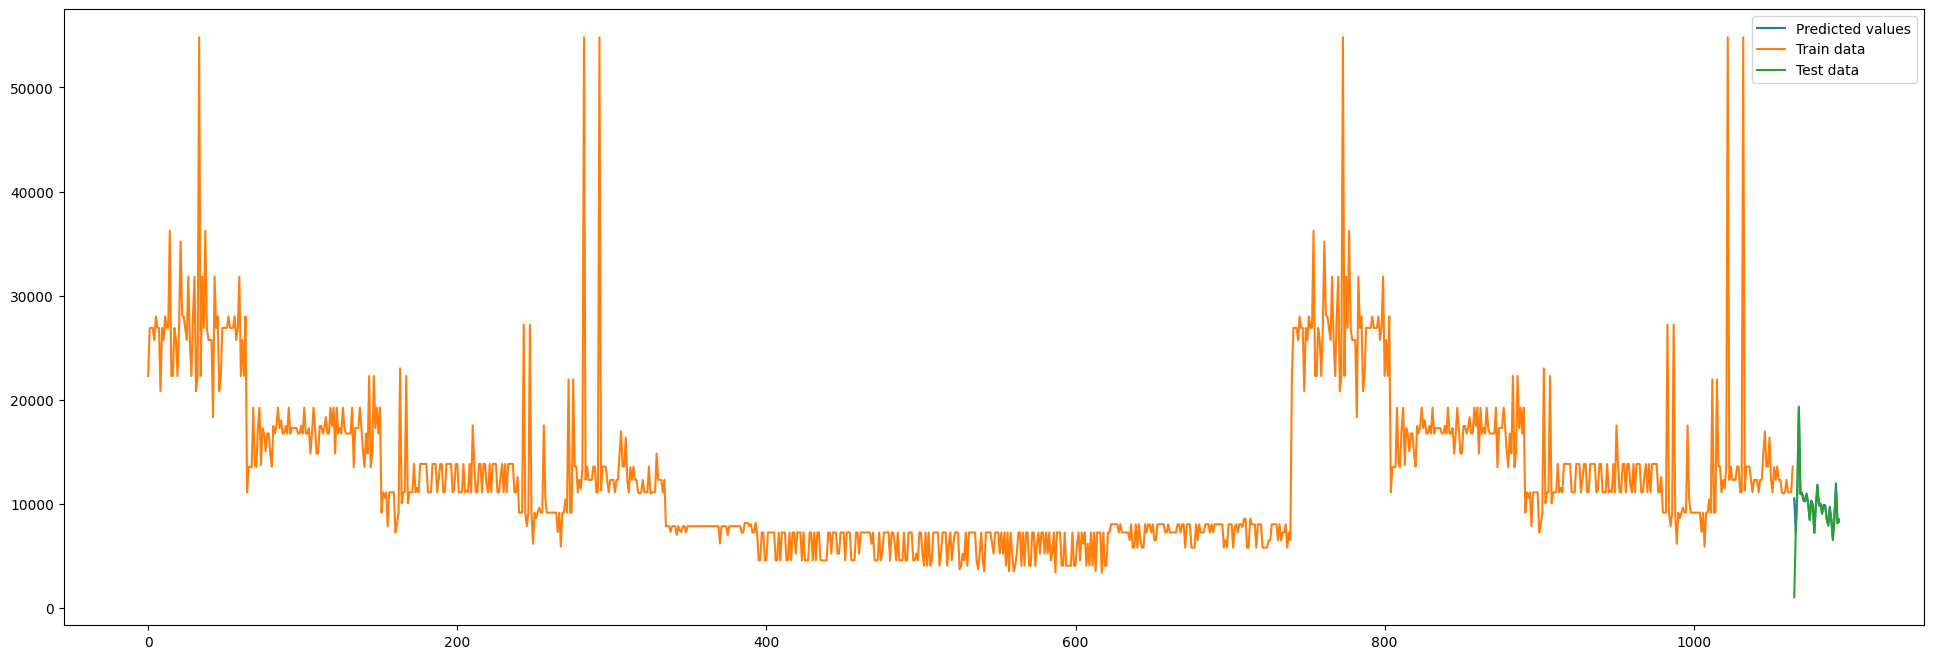

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'linear')


# plot predictions and actual values
predictions.plot(figsize = (24, 8), legend = True, label = "Predicted values")
train['Fare'].plot(legend = True, label = "Train data")
test['Fare'].plot(legend = True, label = "Test data")

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(test['Fare'],predictions)
print(r2)

0.578570215910674


In [ ]:
from joblib import Parallel, delayed
import joblib


joblib.dump(model1, 'Indigo_Ban-del.pkl')
joblib.dump(model2, 'JETAIR_Ben-del.pkl')


['JETAIR_Ben-del.pkl']

In [ ]:
print(predictions)

1065    10505.950648
1066     7252.420138
1067    11279.268443
1068    19308.848590
1069    10927.110570
1070    11072.728367
1071    10255.593330
1072    10351.218382
1073    10969.780165
1074    10079.695233
1075     8519.808010
1076    10292.370410
1077     9910.466236
1078     7206.457157
1079     9846.884016
1080    11801.469207
1081     9858.273128
1082    10003.200130
1083     9095.977050
1084     9878.398027
1085     9860.485794
1086     8574.844902
1087     7918.120542
1088     9689.610335
1089     8434.919437
1090     6554.251955
1091     8721.101803
1092    11934.706004
1093     8131.774978
1094     8262.507699
Name: predicted_mean, dtype: float64


In [ ]:
print(type(predictions))

<class 'pandas.core.series.Series'>


In [ ]:
list(predictions)

[10505.950648483213,
 7252.420138324028,
 11279.268443495623,
 19308.848589948168,
 10927.110569564069,
 11072.728366747386,
 10255.59333015317,
 10351.218382148669,
 10969.780165407523,
 10079.695232579963,
 8519.808009777966,
 10292.370410381562,
 9910.46623640331,
 7206.457156503446,
 9846.884016055858,
 11801.46920678503,
 9858.273128274137,
 10003.200129575074,
 9095.977050392352,
 9878.398026756902,
 9860.485793646962,
 8574.844901683466,
 7918.120541987437,
 9689.61033451451,
 8434.919436519624,
 6554.251954971041,
 8721.10180327065,
 11934.706003542873,
 8131.774977885116,
 8262.507699075739]